In [3]:
import pandas as pd

df = pd.read_csv('mimic_opioid.csv')
print(df.shape)
df.head()

(40470, 18)


,subject_id,hadm_id,gender,anchor_age,last_careunit,los,diabetes,obesity,copd,cad,chf,esrd,esld,stroke,depression,drug_name,died_within_30_days,died_within_1_year
0,10001725,25563031,F,46,Medical/Surgical Intensive Care Unit (MICU/SICU),1.338588,0,0,1,0,0,0,0,0,1,oxycodone,0,0
1,10001884,26184834,F,68,Medical Intensive Care Unit (MICU),9.171817,0,0,1,1,0,0,0,0,0,fentanyl,1,1
2,10002013,23581541,F,53,Cardiac Vascular Intensive Care Unit (CVICU),1.314352,1,1,1,1,0,0,0,0,1,oxycodone,0,0
3,10002348,22725460,F,77,Neuro Intermediate,9.792512,0,0,0,0,0,0,0,0,0,morphine,0,0
4,10002495,24982426,M,81,Coronary Care Unit (CCU),5.087512,1,0,0,1,0,0,0,0,0,morphine,0,0


In [2]:
import pandas as pd

columns = ['diabetes', 'obesity', 'copd', 'cad', 'chf', 'esrd', 'esld', 'stroke', 'depression']


summary_stats = df[columns].describe().T 
summary_stats


,count,mean,std,min,25%,50%,75%,max,proportion
diabetes,40470.0,0.322140,0.467302,0.0,0.0,0.0,1.0,1.0,0.322140
obesity,40470.0,0.126513,0.332431,0.0,0.0,0.0,0.0,1.0,0.126513
copd,40470.0,0.266123,0.441935,0.0,0.0,0.0,1.0,1.0,0.266123
cad,40470.0,0.232098,0.422176,0.0,0.0,0.0,0.0,1.0,0.232098
chf,40470.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
esrd,40470.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
esld,40470.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
stroke,40470.0,0.192982,0.394644,0.0,0.0,0.0,0.0,1.0,0.192982
depression,40470.0,0.230220,0.420979,0.0,0.0,0.0,0.0,1.0,0.230220


In [21]:
df['drug_name'].value_counts()

drug_name
oxycodone        21616
fentanyl          7833
morphine          7066
tramadol          1738
meperidine        1197
methadone          759
buprenorphine      231
hydrocodone         30
Name: count, dtype: int64

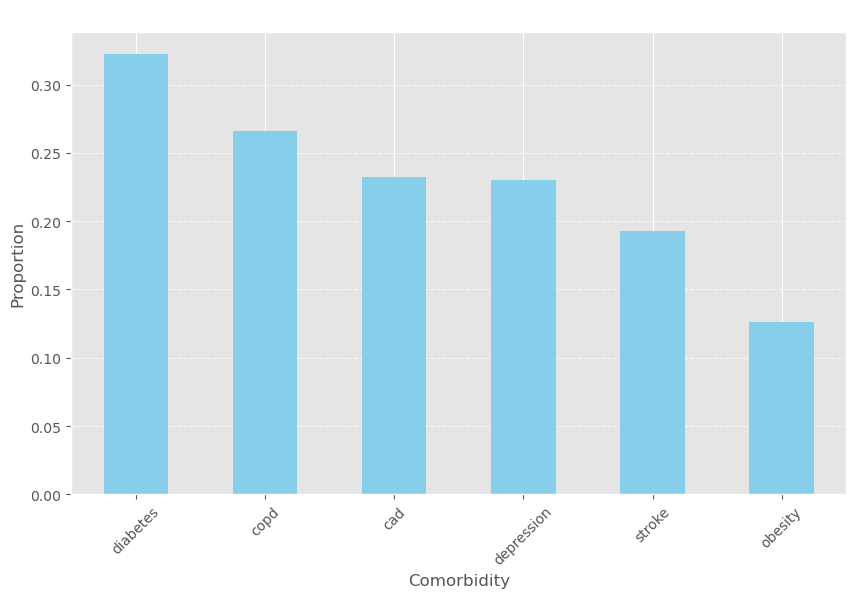

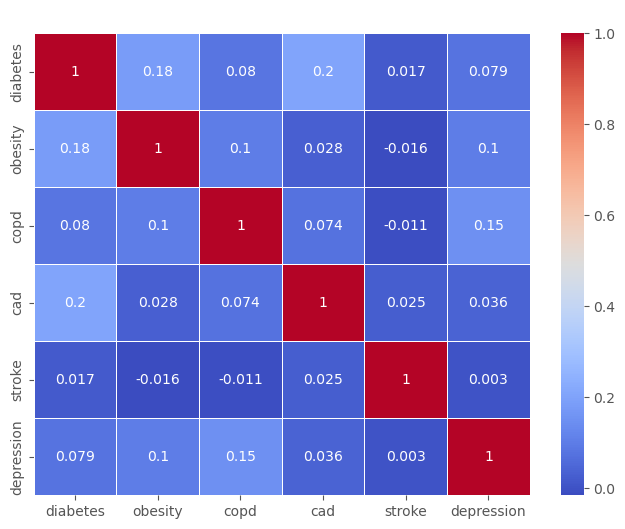

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


columns = ['diabetes', 'obesity', 'copd', 'cad', 'stroke', 'depression']

plt.style.use('ggplot')  # Grey background style
plt.figure(figsize=(10, 6))


df[columns].mean().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.ylabel('Proportion')
plt.xlabel('Comorbidity')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Patient Comorbidities')
plt.savefig('comorbidity.pdf', bbox_inches='tight')
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(df[columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Conditions')
plt.savefig('comorbidity_heatmap.png', bbox_inches='tight')
plt.show()


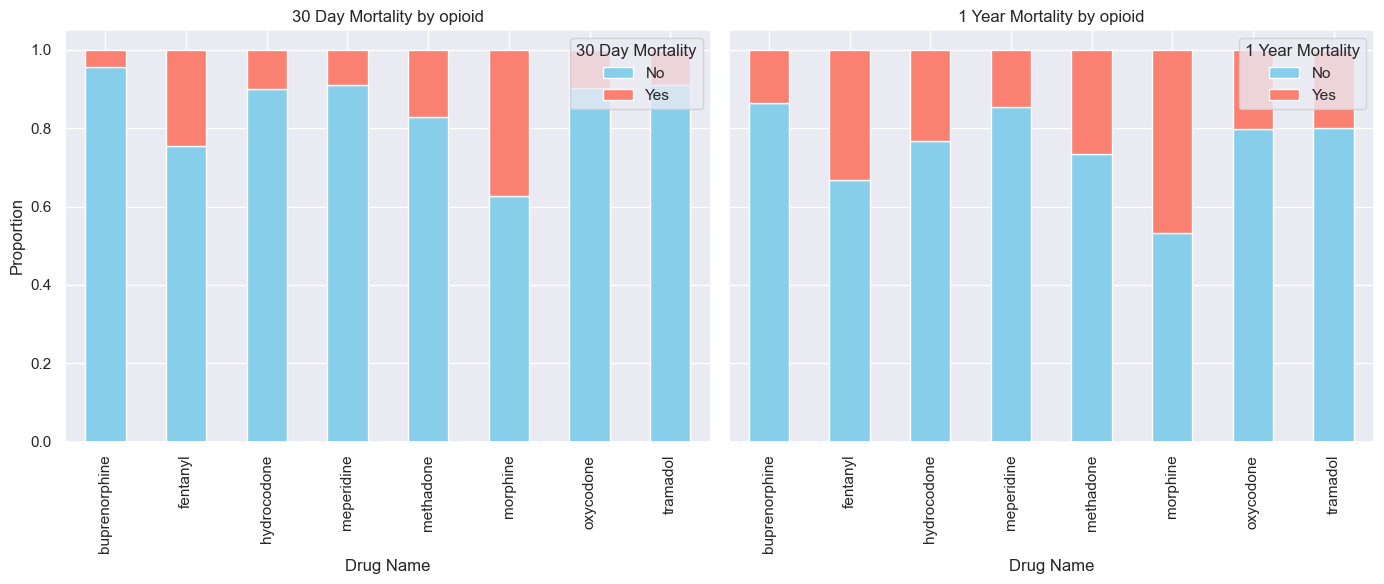

<Figure size 1200x800 with 0 Axes>

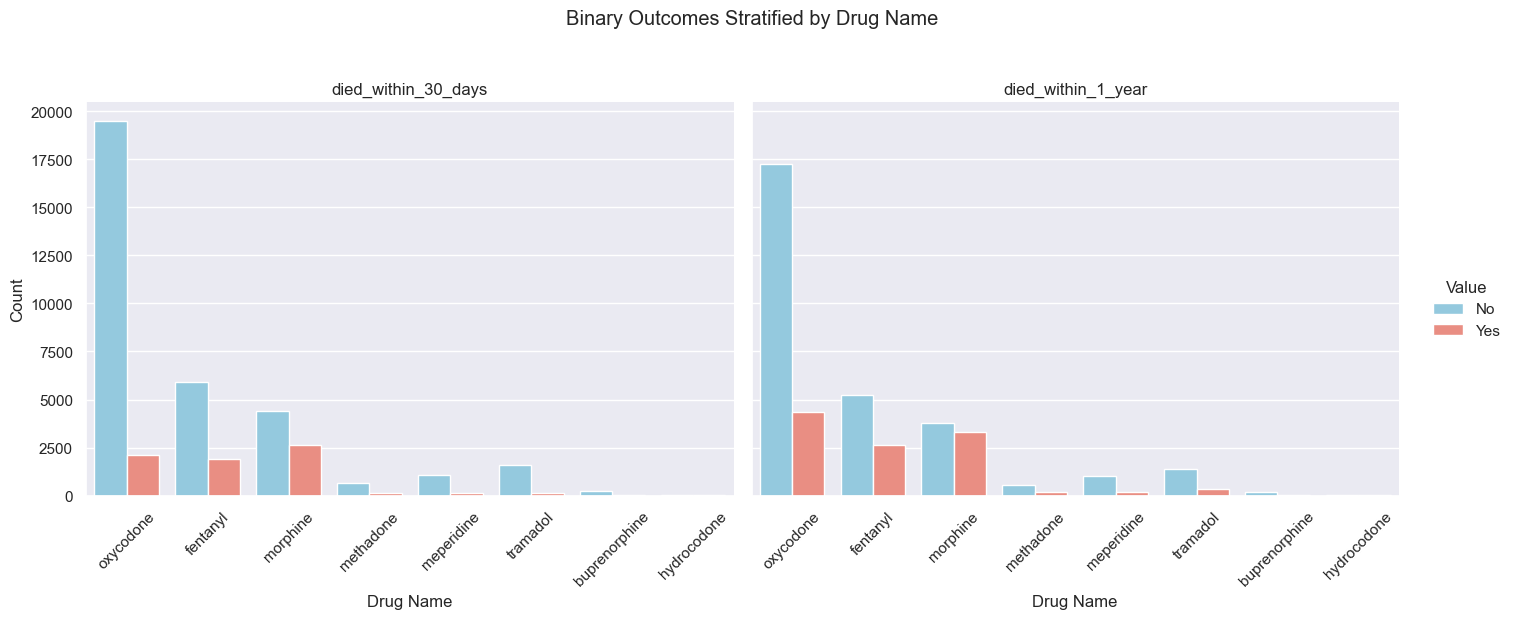

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

binary_columns = ['died_within_30_days', 'died_within_1_year']
category_column = 'drug_name'
binary_map = {0: 'No', 1: 'Yes'}
titles = ['30 Day Mortality', '1 Year Mortality']
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)


for i, col in enumerate(binary_columns):
    proportions = pd.crosstab(df[category_column], df[col].map(binary_map), normalize='index')
    proportions.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=axes[i])
    axes[i].set_title(f'{titles[i]} by opioid')
    axes[i].set_ylabel('Proportion')
    axes[i].set_xlabel('Drug Name')
    axes[i].legend(title=titles[i], loc='upper right')

plt.tight_layout()
plt.savefig('stacked_binary_by_drug_yes_no.png', bbox_inches='tight')
plt.show()


plt.figure(figsize=(12, 8))
sns.set(style='darkgrid')

# Melt dataframe for easier plotting, mapping binary columns to 'Yes'/'No'
df_melted = df.melt(id_vars=[category_column], value_vars=binary_columns, 
                    var_name='Outcome', value_name='Value')
df_melted['Value'] = df_melted['Value'].map(binary_map)  # Apply the mapping

# Plot
g = sns.catplot(x=category_column, hue='Value', col='Outcome', data=df_melted, kind='count', 
                palette=['skyblue', 'salmon'], height=6, aspect=1.2)
g.set_axis_labels('Drug Name', 'Count')
g.set_titles('{col_name}')
g.fig.suptitle('Binary Outcomes Stratified by Drug Name', y=1.03)
g.set_xticklabels(rotation=45)
g.tight_layout()

# Save the facet grid plot
g.savefig('facet_binary_by_drug_yes_no.png', bbox_inches='tight')
plt.show()



/var/folders/51/gj9t157n4031k3ffqq7t56580000gn/T/ipykernel_5274/1264512831.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['los'], shade=True, color="skyblue")


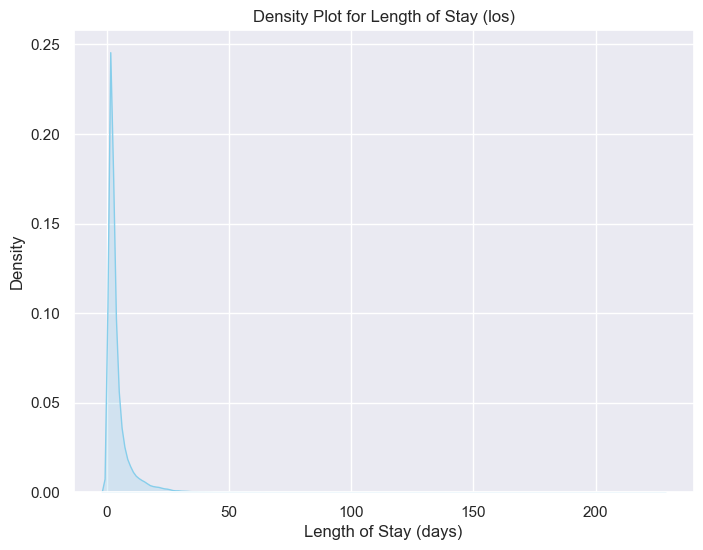

In [22]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['los'], shade=True, color="skyblue")
plt.title('Density Plot for Length of Stay (los)')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Density')
plt.savefig('density_los.png', bbox_inches='tight')
plt.show()

/var/folders/51/gj9t157n4031k3ffqq7t56580000gn/T/ipykernel_5274/2666824298.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['anchor_age'], shade=True, color="salmon")


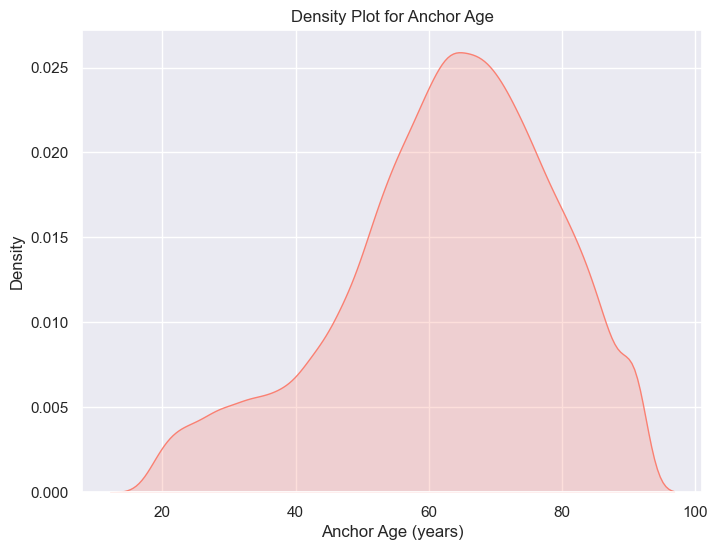

In [23]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['anchor_age'], shade=True, color="salmon")
plt.title('Density Plot for Anchor Age')
plt.xlabel('Anchor Age (years)')
plt.ylabel('Density')
plt.savefig('density_anchor_age.png', bbox_inches='tight')
plt.show()

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Assume df is your existing DataFrame from which you want to compute statistics

# Initialize a list to accumulate row data to be later converted to DataFrame
stats_list = []

# Iterate over each column in the DataFrame
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        print(f'Processing {column}...')
        
        # Calculate statistical measures
        mean = round(df[column].mean(), 2)
        median = round(df[column].median(), 2)
        mode_series = df[column].mode()
        mode = round(mode_series[0], 2) if not mode_series.empty else None
        minimum = round(df[column].min(), 2)
        maximum = round(df[column].max(), 2)
        range_ = round(maximum - minimum, 2)
        variance = round(df[column].var(), 2)
        std_dev = round(df[column].std(), 2)
        q1 = round(df[column].quantile(0.25), 2)
        q3 = round(df[column].quantile(0.75), 2)
        iqr = round(q3 - q1, 2)
        
        # Append the results into the list
        stats_list.append({
            'Column': column,
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Min': minimum,
            'Max': maximum,
            'Range': range_,
            'Variance': variance,
            'Standard Deviation': std_dev,
            'Q1': q1,
            'Q3': q3,
            'IQR': iqr
        })

# Convert the list of dictionaries to a DataFrame
stats_df = pd.DataFrame(stats_list)

# Display the statistics DataFrame
stats_df

Processing subject_id...
Processing hadm_id...
Processing anchor_age...
Processing los...
Processing diabetes...
Processing obesity...
Processing copd...
Processing cad...
Processing chf...
Processing esrd...
Processing esld...
Processing stroke...
Processing depression...
Processing died_within_30_days...
Processing died_within_1_year...


,Column,Mean,Median,Mode,Min,Max,Range,Variance,Standard Deviation,Q1,Q3,IQR
0,subject_id,15012139.64,15018942.00,10000032.00,10000032.0,19999828.0,9999796.0,8.350702e+12,2889758.09,12517510.25,17525044.75,5007534.5
1,hadm_id,24976630.81,24985020.00,20000094.00,20000094.0,29999625.0,9999531.0,8.297158e+12,2880478.84,22485122.25,27455874.75,4970752.5
2,anchor_age,62.54,64.00,63.00,18.0,91.0,73.0,2.619300e+02,16.18,53.00,74.00,21.0
3,los,4.13,2.15,1.06,0.0,226.4,226.4,3.702000e+01,6.08,1.20,4.30,3.1
4,diabetes,0.32,0.00,0.00,0.0,1.0,1.0,2.200000e-01,0.47,0.00,1.00,1.0
5,obesity,0.13,0.00,0.00,0.0,1.0,1.0,1.100000e-01,0.33,0.00,0.00,0.0
6,copd,0.27,0.00,0.00,0.0,1.0,1.0,2.000000e-01,0.44,0.00,1.00,1.0
7,cad,0.23,0.00,0.00,0.0,1.0,1.0,1.800000e-01,0.42,0.00,0.00,0.0
8,chf,0.00,0.00,0.00,0.0,0.0,0.0,0.000000e+00,0.00,0.00,0.00,0.0
9,esrd,0.00,0.00,0.00,0.0,0.0,0.0,0.000000e+00,0.00,0.00,0.00,0.0


In [16]:
df['anchor_age'].unique().shape

(73,)